# FAIR maturity indicators for nanosafety

by [Serena Bonaretti](https://sbonaretti.github.io) and [Egon Willighagen](https://egonw.github.io), Maastricht University

---


<a name="imports"></a>
#### Imports

In [1]:
# import python packages
import os
import pandas as pd
import requests
import time
import xml.etree.ElementTree as ET
import json
from io import StringIO
import urllib.parse


In [ ]:
# Import R for visualization using ggplot2 - comment if used in mybinder, uncomment if used locally
#os.environ['R_HOME'] = '/Library/Frameworks/R.framework/Resources' # put here your own R directory 

In [ ]:
%load_ext rpy2.ipython

--- 

<a name="visualization"></a>
### FAIR assessment visualization

In [3]:
import numpy as np
# create empty dataframe 
df = pd.DataFrame()

data = {
        "F1"    : [0],
        "F2"    : [0],
        "F3"    : [0],
        "F4"    : [0],
        "A1"    : [0],
        "A11"   : [0],
        "A12"   : [0], 
        "A2"    : [0],
        "I1"    : [0],
        "I2"    : [0],
        "I3"    : [0],
        "R1"    : [0],
        "R11"   : [0],   
        "R12"   : [0],     
        "R13"   : [0],


       }

# create dataframe
df = pd.DataFrame (data)

# transpose for plotting (to be retranspose in plotting)
df = df.T

# change column names
df.columns = ['TiO2_ChEMBL']




df = df.drop(columns='TiO2_ChEMBL')


Parkinsons_AE   = [0,1,1,1,1,1,1,1,1,-0.001,0 ,1,1,1,-0.001]
NBIA_GEO   = [0,1,1,0,1,1,1,0,1,-0.001,0 ,1,1,0,-0.001]

tio2_enanomapper   = [0,1,1,1,1,1,1,0,1,-0.001,0 ,1,1,0,-0.001]
tio2_cananolab   = [0,1,1,1,1,1,1,0,1,-0.001,1,1,1,0,-0.001]
tio2_chembl         = [1,1,1,1,1,1,1,0,1,-0.001,1,1,1,0.5,-0.001]
tio2_nanocommons         = [0,1,1,1,1,1,1,0,0,-0.001,0,1,1,0,-0.001]

df["Parkinsons_AE"]     = Parkinsons_AE
df["NBIA_GEO"]   = NBIA_GEO

df["TiO2_eNanoMapper"]     = tio2_enanomapper
df["TiO2_caNanoLab"]   = tio2_cananolab
df["TiO2_ChEMBL"] = tio2_chembl
df["TiO2_NanoCommons"] = tio2_nanocommons

principles         = ["F",      "F",         "F",         "F",      "A",         "A",         "A",         "A",         "I",       "I",             "I",      "R",         "R",         "R"          ,"R"]
metric_names       = ["F1",     "F2",        "F3",        "F4",     "A1",        "A11",       "A12",       "A2",        "I1",      "I2",            "I3",     "R1",        "R11",       "R12"        ,"R13" ]
retrieval_type     = ["manual", "automatic", "automatic", "manual", "automatic", "automatic", "automatic", "automatic", "manual",  "N/A",  "manual", "automatic", "automatic", "automatic" , "N/A" ]
df["principles"]     = principles
df["metric_names"]   = metric_names
df["retrieval_type"] = retrieval_type

# display
pd.set_option("display.max_rows",df.shape[0])
df

,Parkinsons_AE,NBIA_GEO,TiO2_eNanoMapper,TiO2_caNanoLab,TiO2_ChEMBL,TiO2_NanoCommons,principles,metric_names,retrieval_type
F1,0.000,0.000,0.000,0.000,1.000,0.000,F,F1,manual
F2,1.000,1.000,1.000,1.000,1.000,1.000,F,F2,automatic
F3,1.000,1.000,1.000,1.000,1.000,1.000,F,F3,automatic
F4,1.000,0.000,1.000,1.000,1.000,1.000,F,F4,manual
A1,1.000,1.000,1.000,1.000,1.000,1.000,A,A1,automatic
A11,1.000,1.000,1.000,1.000,1.000,1.000,A,A11,automatic
A12,1.000,1.000,1.000,1.000,1.000,1.000,A,A12,automatic
A2,1.000,0.000,0.000,0.000,0.000,0.000,A,A2,automatic
I1,1.000,1.000,1.000,1.000,1.000,0.000,I,I1,manual
I2,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,I,I2,N/A


[1] 6
    Parkinsons_AE
F1          0.000
F2          1.000
F3          1.000
F4          1.000
A1          1.000
A11         1.000
A12         1.000
A2          1.000
I1          1.000
I2         -0.001
I3          0.000
R1          1.000
R11         1.000
R12         1.000
R13        -0.001


R[write to console]: Saving 6.5 x 5 in image



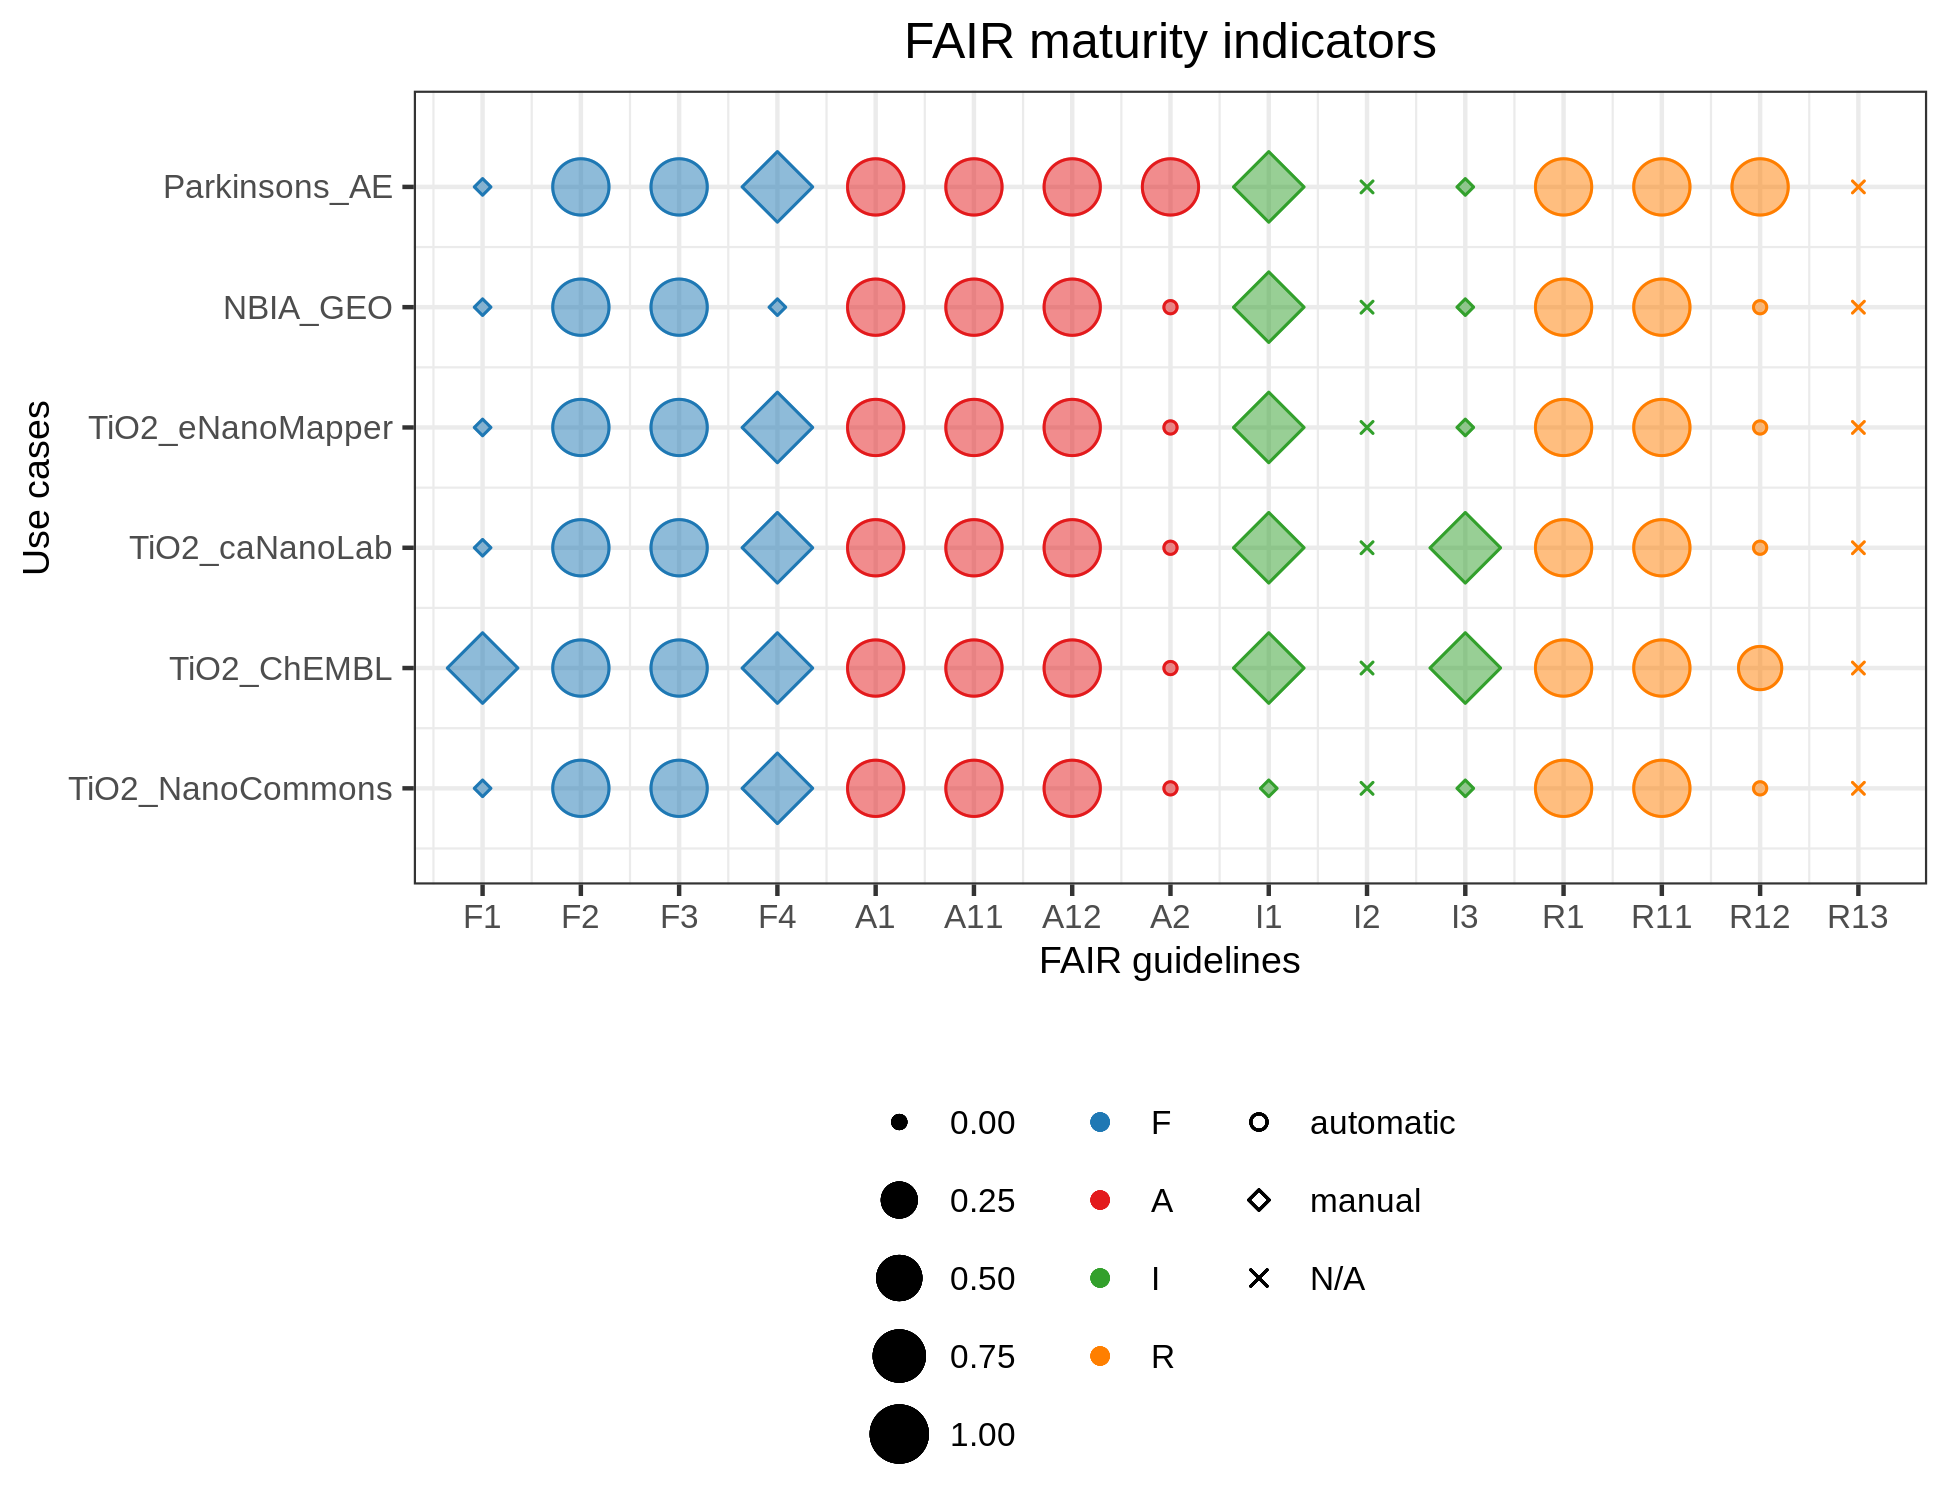

In [4]:
%%R -i df -w 6.5 -h 5 --units in -r 300 #-i df 

library(ggplot2)

# variables
y_values   <- seq(1, nrow(df))
y_values   <- sort(y_values, decreasing = TRUE)
n_of_cases <- ncol(df)-3

#n_of_cases <- 4
case_names <- rev(colnames(df)[1:n_of_cases])
# font size
title_text_size <- 12
axis_text_size  <- 9
tick_text_size  <- 8

# initiate graph
pl <- ggplot (data=df, aes(x=x_values1, y=y_values, color=principles, shape=retrieval_type))

print(n_of_cases)
print(df[1])
# add cases in for loop
for (i in (1:n_of_cases)){

    # create a new dataframe with what needed for the current repository
    # (if one keeps indexes in geom_point, ggplot plots only the last very line - see https://stackoverflow.com/questions/18444620/set-layers-in-ggplot2-via-loop)
    gg.data <- data.frame(current_df=df[i], x_values=rep(i, nrow(df)), principles=df$principles, retrieval_type=df$retrieval_type)
   
    # change specific column name (e.g.DANSEASY) to a generic name
    colnames(gg.data)[1]<-"dataset"
    
    pl <- pl + 
          geom_point(data=gg.data, aes(x=x_values, y=y_values, size=dataset, color=principles, shape=retrieval_type)) + # add size, color, and shape
          geom_point(data=gg.data, aes(x=x_values, y=y_values, size=dataset, fill=principles, shape=retrieval_type), alpha=0.5, show.legend = FALSE) 
}

# add layers to plot
pl <- pl +
        # change shapes to squares, circles, and crosses
        scale_shape_manual(values = c(21,23,4)) +
        # background
        theme_bw() +  
        # flip x and y
        coord_flip()  +
        # axis ticks
        scale_x_reverse(limits=c(n_of_cases+0.5,0.5), breaks=seq(n_of_cases,1,-1), labels=case_names) + #,  labels=c(colnames(df)[4], colnames(df)[3], colnames(df)[2], colnames(df)[1])) + 
        scale_y_reverse(limits=c(15, 1),   breaks=seq(15,1,-1), labels=df$metric_names) + 
        theme(axis.text.x = element_text(size = tick_text_size)) + 
        theme(axis.text.y = element_text(size = tick_text_size)) +
        # axis text
        xlab ("Use cases") +
        ylab ("FAIR guidelines") +
        theme(text = element_text( size = axis_text_size)) + 
        # change colors for lines
        scale_color_manual(values=c("#e31a1c", "#1f78b4", "#33a02c", "#ff7f00") ,
                           labels = c("F", "A", "I", "R"),
                           breaks = c("F", "A", "I", "R")
                          ) +  
        # change colors for fills
        scale_fill_manual(values=c("#e31a1c", "#1f78b4", "#33a02c", "#ff7f00")) +
        # title
        ggtitle("FAIR maturity indicators") +
        theme(plot.title = element_text(size = title_text_size, hjust = 0.5))  +
        # legend - colors
        theme(legend.text = element_text(size=tick_text_size), legend.key.size = unit(0.2, "cm")) + 
        labs(color="") +                             # no legend title   
        labs(size="")  +                             # no legend title 
        labs(shape="") +                             # no legend title 
        theme (legend.spacing.x = unit(0.1, "cm"),   # reduce horizontal space between legends
               legend.box = "horizontal",            # put legends next to each other
               legend.direction = "vertical",        # 
               legend.position = "bottom",           # under the graph
               legend.key.size = unit(1.3, 'lines'), # space better legend items
               legend.margin=margin(c(1,7,1,1))) +   # margin around each legend 
        guides(color = guide_legend(order=2),        # change legend order
               size  = guide_legend(order=1),
               shape = guide_legend(order=3))
# display
ggsave("all.png", plot = pl)

pl